In [4]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [5]:
!ls /kaggle/input/


happytest  newnew  sadtest


In [6]:
import tensorflow as tf
import os

In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [8]:
len(gpus)

0

In [9]:
#avoid OOM errors by setting GPU memory consumption growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memrory_growth(gpu,True)

In [10]:
!pip install opencv-python

In [11]:
import os
import cv2
import imghdr


In [12]:
import os

datasets = os.listdir("/kaggle/input/")
print("Available Datasets:", datasets)



Available Datasets: ['newnew', 'happytest', 'sadtest']


In [13]:
for folder in os.listdir("/kaggle/input/"):
    print(f"Checking: {folder}")
    print(os.listdir(f"/kaggle/input/{folder}"))


Checking: newnew
['happy people', 'sad people']
Checking: happytest
['Happy-Guy.jpg']
Checking: sadtest
['sad_person_test.jpg']


In [14]:
print(os.listdir("/kaggle/input/newnew"))


['happy people', 'sad people']


In [15]:
import shutil

source_folder = "/kaggle/input/newnew/"  # Original dataset
destination_folder = "/kaggle/working/new_dataset/"  # Writable copy

# Copy the entire dataset
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Dataset copied successfully!")


Dataset copied successfully!


In [16]:
import os
import cv2
import imghdr

folder_path ="/kaggle/working/new_dataset"  # Use the copied dataset


# Iterate through both folders: happy people and sad people
for category in ["happy people","sad people"]:
    category_path = os.path.join(folder_path, category)

    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        
        try:
            ext = imghdr.what(image_path)  # Detect image type
            if ext not in ["jpeg", "png", "bmp", "jpg"]:  # Allowed formats
                print(f"Removing {image_path} (Invalid file type: {ext})")
                os.remove(image_path)  # Remove non-image files
                continue

            # Load with OpenCV to check corruption
            img = cv2.imread(image_path)
            if img is None:
                print(f"Removing {image_path} (Corrupt image)")
                os.remove(image_path)

        except Exception as e:
            print(f"Error with file {image_path}: {e}")
            os.remove(image_path)  # Remove problematic files


Removing /kaggle/working/new_dataset/happy people/download (35).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (29).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (19).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (31).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (25).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (22).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (18).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (23).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (26).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download (34).svg (Invalid file type: None)
Removing /kaggle/working/new_dataset/happy people/download.g

In [17]:
import cv2
import os
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def is_blurry(image_path, threshold=300):  # Stricter blur filter
    image = cv2.imread(image_path)
    if image is None:
        return True
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var() < threshold

# Assuming face_cascade is already defined elsewhere
def contains_face(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return False

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return len(faces) > 0

# Combine both filters
for category in ["happy people", "sad people"]:
    category_path = os.path.join(folder_path, category)

    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)

        try:
            if is_blurry(image_path, threshold=300) or not contains_face(image_path):
                print(f"Removing {image_path} (Blurry or No Face)")
                os.remove(image_path)

        except Exception as e:
            print(f"Error processing {image_path}: {e}")










Removing /kaggle/working/new_dataset/happy people/images - 2025-03-18T183957.498.jpg (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/download (41).jpg (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/images - 2025-03-18T183850.653.jpg (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/download (21).png (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/images - 2025-03-18T183853.953.jpg (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/images - 2025-03-18T183925.918.jpg (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/faviconV2 - 2025-03-18T184310.816.png (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/faviconV2 - 2025-03-18T184307.480.png (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/faviconV2 - 2025-03-18T184315.155.png (Blurry or No Face)
Removing /kaggle/working/new_dataset/happy people/download (28).png (Blurry or N

In [18]:
happy_new_path ="/kaggle/working/new_dataset/happy people" 
image_files = os.listdir(happy_new_path)

# Select the first image
image_name = image_files[0]  # Change the index if needed
img = cv2.imread(os.path.join(happy_new_path, image_name))
img.shape



(168, 300, 3)

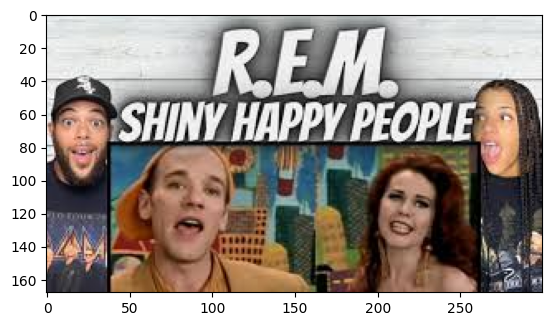

In [19]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

folder_path = "/kaggle/working/new_dataset" 

# Create a dataset from the folder
data_iterator = tf.keras.preprocessing.image_dataset_from_directory(folder_path)

# Convert dataset to numpy iterator
for batch in data_iterator.as_numpy_iterator():
    print(batch) # This will print images as NumPy arrays
    break  # Stop after one batch


In [ ]:
len(batch)

In [ ]:
batch[0].shape

In [ ]:
#class 1=sad people
#class 0=happy people
batch[1]

****preprocessing data****

In [ ]:
scaled=batch[0]/255
scaled.max()

1.0

In [ ]:
data=data_iterator.map(lambda x,y:(x/255,y)) ##x is our images,y is target variable

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch1=scaled_iterator.next()

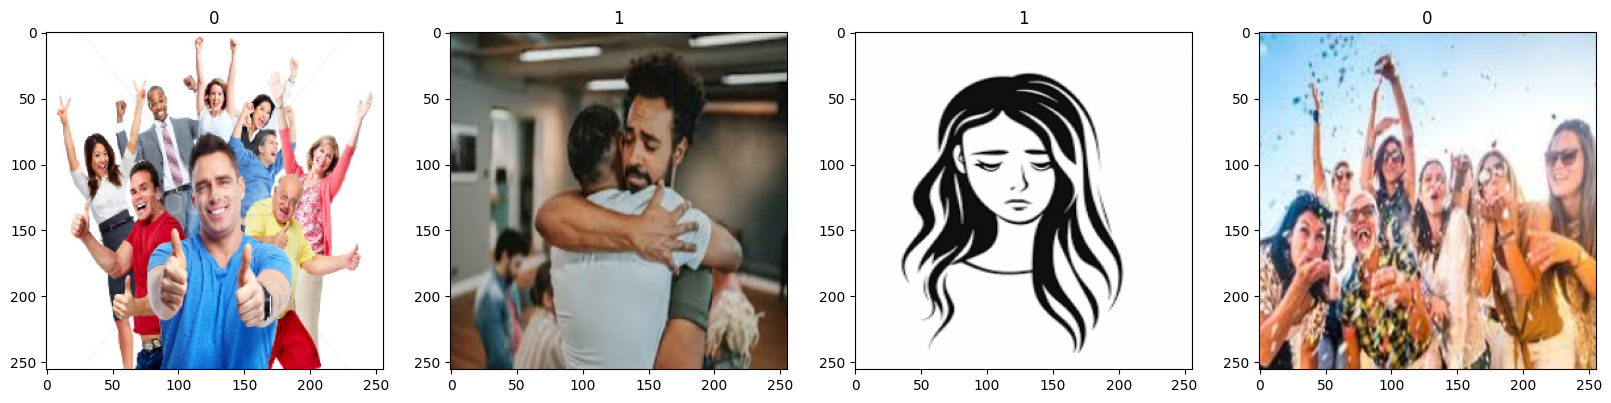

In [29]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch1[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch1[1][idx])

**split data**

In [30]:
len(data)

15

In [31]:
total = len(data)
train_size = int(total * 0.7)
val_size = int(total * 0.2)
test_size = total - train_size - val_size  # Remaining samples

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size)

print(f"Train size: {train_size}, Val size: {val_size}, Test size: {test_size}")


Train size: 10, Val size: 3, Test size: 2


**bild deep learning model**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [33]:
model=Sequential()

In [34]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the Sequential model and specify input shape in the first Conv2D layer
model = Sequential([
    Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(32, (3,3), strides=1, activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), strides=1, activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: Happy/Sad
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,769,697 (56.34 MB)

 Trainable params: 14,769,697 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import os

# Create a directory called 'log' if it doesn't exist
os.makedirs("log", exist_ok=True)


In [38]:
logdir='log'

In [39]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5950 - loss: 3.2998 - val_accuracy: 0.6458 - val_loss: 0.6399
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5835 - loss: 0.6956 - val_accuracy: 0.6146 - val_loss: 0.6282
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6128 - loss: 0.6271 - val_accuracy: 0.7812 - val_loss: 0.5862
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7718 - loss: 0.5539 - val_accuracy: 0.6875 - val_loss: 0.5682
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7620 - loss: 0.4755 - val_accuracy: 0.6562 - val_loss: 0.5655
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8123 - loss: 0.4316 - val_accuracy: 0.7917 - val_loss: 0.4035
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8504 - loss: 0.3088 - val_accuracy: 0.8646 - val_loss: 0.3661
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8753 - loss: 0.3057 - val_accuracy: 0.9167 - val_loss:

**Plot performance**

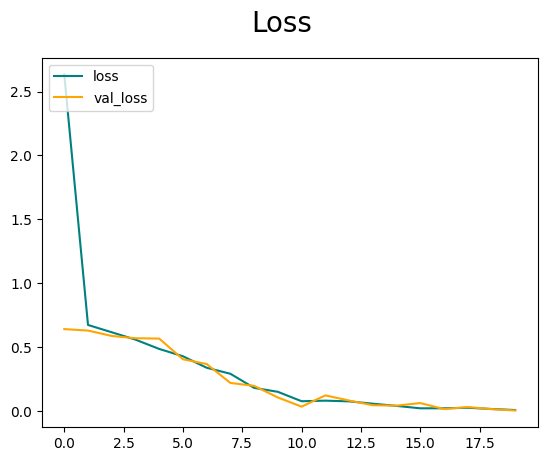

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

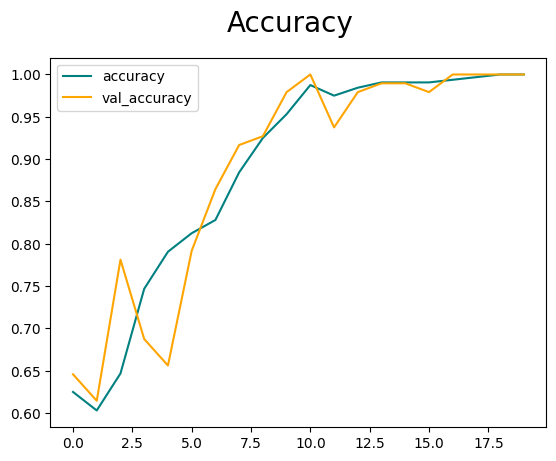

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate**

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [46]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


**Test**

In [47]:
import cv2

In [48]:
img1_path = "/kaggle/input/happytest/Happy-Guy.jpg"
img2_path = "/kaggle/input/sadtest/sad_person_test.jpg"



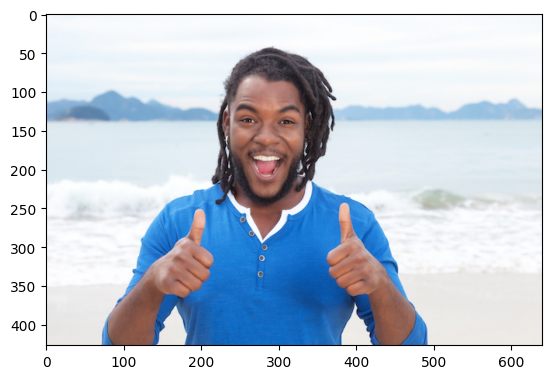

In [55]:
import cv2
img=cv2.imread(img1_path)
img = cv2.imread(img1_path)  # Reads in BGR format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


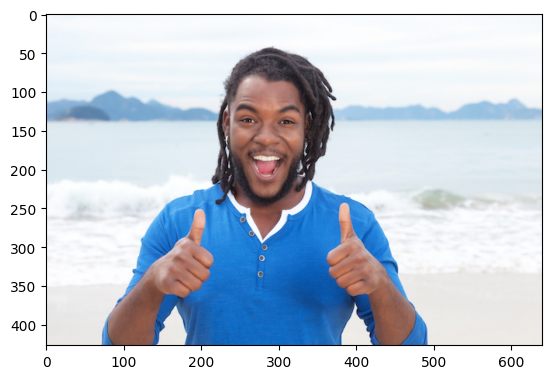

In [56]:
resize=tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.imshow(img_rgb)

In [57]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [58]:
yhat

array([[0.00021726]], dtype=float32)

In [59]:
if yhat>0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


**save the model**

In [68]:
model.save('/kaggle/working/imageclassifier.h5')


In [69]:
from tensorflow.keras.models import load_model

In [70]:
new_model = load_model('/kaggle/working/imageclassifier.h5')


In [71]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.00021726]], dtype=float32)